# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [4]:
# Import the appropriate libraries with aliases
# Create two new dataframes
import pandas as pd
import numpy as np
North_df = pd.read_csv('NorthCallCenter.csv')
South_df = pd.read_csv('SouthCallCenter.csv')

North_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [5]:
South_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [6]:
# EDA Question 1A solution below:
North_reps_distinct_count = North_df['Rep ID'].nunique()
print(North_reps_distinct_count)

9


#### EDA Question 1B:  How many reps are in the South branch?  

In [7]:
# EDA Question 1B solution Below:
South_reps_distinct_count = South_df['Rep ID'].nunique()
print(South_reps_distinct_count)

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [8]:
# EDA Question 2A solution Below:
North_df['Busy Minutes'].mean().round(2) 
North_df['Not Ready Minutes'].mean().round(2)
North_df['Incoming Wait Time'].mean().round(2)
North_df['During Call Wait Time'].mean().round(2)

np.float64(2.97)

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [9]:
# EDA Question 2B solution Below:
South_df['Busy Minutes'].mean().round(2) 
South_df['Not Ready Minutes'].mean().round(2)
South_df['Incoming Wait Time'].mean().round(2)
South_df['During Call Wait Time'].mean().round(2)

np.float64(3.08)

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [10]:
# EDA Question 3 solution Below:
combined_df = pd.concat([North_df, South_df])
combined_df.groupby('Time Block')['Calls'].sum()

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [11]:
# Question 1 solution below
North_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [12]:
South_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [13]:
North_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

#### Record your answer below:

> Your Answer: The 'Incoming Wait Time' column in the North Call Center dataset contains 163 null values, and the same column in the South Call Center dataset contains 188 null/missing values. There are only about 50-80 non-null values in this column for the datasets. However, this column seems important in determining which call center location needs help. To solve this, I might interpolate the missing values using the mean.

In [14]:
# Interpolating missing values for Incoming Wait Time
North_incoming_mean = North_df['Incoming Wait Time'].mean().round(2) 
# = 3.05
South_incoming_mean = South_df['Incoming Wait Time'].mean().round(2)
# = 3.0 

North_df['Incoming Wait Time'].fillna(North_incoming_mean, inplace=True)
South_df['Incoming Wait Time'].fillna(South_incoming_mean, inplace=True)

/var/folders/rw/z7w4hy9s6l3bz7kns43sc2j00000gn/T/ipykernel_1567/4144830151.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  North_df['Incoming Wait Time'].fillna(North_incoming_mean, inplace=True)
/var/folders/rw/z7w4hy9s6l3bz7kns43sc2j00000gn/T/ipykernel_1567/4144830151.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [15]:
North_df.isna().sum()
South_df.isna().sum()
North_df.tail()
South_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,3.0,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,3.0,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,3.0,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,3.0,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,3.0,3,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [16]:
# Cleaning Question 2 solution below:
print(North_df.to_string(index=False))

 Unnamed: 0 Branch    Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
          0  North       Complaint    9:00 AM             Incoming     B  Brent   NO          0          1             9                  2                1.00                      4      1
          1  North   Sales Support   11:00 AM             Incoming     A    Cam   NO          0          0            11                  1                1.00                      3      1
          2  North   Sales Support   11:00 AM             Incoming     B   Todd   NO          0          0             9                  3                1.00                      3      1
          3  North   Sales Support    4:00 PM             Incoming     B  Brent   NO          0          0            11                  2                1.00                      4      1
          4  North Product Support   12:00 PM     

In [17]:
print(North_df.dtypes)
# Sale column is object datatype
def count_occurrences(df, column_name, value):
    return df[column_name].value_counts().get(value, 0)
df = pd.DataFrame(North_df)
count_YES1 = count_occurrences(df, 'Sale', 'YES ')
count_YES2 = count_occurrences(df, 'Sale', 'YES')
count_NO = count_occurrences(df, 'Sale', 'NO')

print(count_YES1, count_YES2, count_NO)

Unnamed: 0                 int64
Branch                    object
Call Purpose              object
Time Block                object
Incoming or Outgoing      object
Queue                     object
Rep ID                    object
Sale                      object
Lost Call                  int64
Abandoned                  int64
Busy Minutes               int64
Not Ready Minutes          int64
Incoming Wait Time       float64
During Call Wait Time      int64
Calls                      int64
dtype: object
1 10 234


In [18]:
North_df['Sale'] = df['Sale'].str.replace('YES ', 'YES')
unique_values = North_df['Sale'].unique()
print(unique_values)

['NO' 'YES']


##### Record your answer by below:
> Your Answer: I first counted how many times the irregular "YES " value occurred in the column. Then, I converted this to match the correct value for "YES". To make sure this was fixed, I counted the unique values. The output was the standardized "YES" and "NO"

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [19]:
# Cleaning Question 3 solution below:
North_unique_values = North_df['Rep ID'].nunique()
print(North_unique_values)

South_unique_values = South_df['Rep ID'].nunique()
print(South_unique_values)
print(South_df['Rep ID'].unique())

9
11
['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']


##### Record your answer below:
> Your Answer: In this dataset, we should expect to see "duplicate" values in each column. However,these are necessary in categorizing each call and tracing it back to the representative who took or made the call. Therefore, there are no duplicate values in either dataset.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [20]:
# Cleaning Question 4 solution below:
# Each columnn seems pertinent to answering the business question. Therefore, there is no unnecessary data to handle.

##### Record your answer below:
> Your Answer: Each columnn seems pertinent to answering the business question. Therefore, there is no unnecessary data to handle.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [21]:
# Create dataframe for the entire company named df
df = pd.concat([North_df, South_df])

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [22]:
# Manipulation Question solution below:
combined_df.groupby('Rep ID').sum().sort_values(by='Calls')

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,,,,,,
Alice,3637,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Sales SupportProduct SupportProduct SupportSal...,10:00 AM5:00 PM5:00 PM1:00 PM10:00 AM2:00 PM10...,IncomingIncomingIncomingIncomingIncomingIncomi...,CCCCCCCCCCCCCCCCCCCC,NONONONONONONONONONONONONONONONONONONONO,0,0,199,46,15.0,58,20
Amanda,2666,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,Product SupportProduct SupportProduct SupportS...,4:00 PM12:00 PM1:00 PM10:00 AM10:00 AM11:00 AM...,IncomingIncomingIncomingIncomingIncomingOutgoi...,AAAAAAAAAAAAAAAAAAAAAAA,NONONONOYESNONONONONONONONONONONONONONONONONONO,0,1,229,43,12.0,60,23
Andy,2494,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,ComplaintSales SupportProduct SupportProduct S...,2:00 PM1:00 PM3:00 PM5:00 PM12:00 PM11:00 AM3:...,IncomingIncomingIncomingIncomingIncomingIncomi...,AAAAAAAAAAAAAAAAAAAAAAA,NONONONONONONOYESNONONOYESNONONONONONONONONONONO,0,3,228,43,36.0,65,23
Cam,2746,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,Sales SupportProduct SupportProduct SupportPro...,11:00 AM3:00 PM3:00 PM4:00 PM12:00 PM11:00 AM2...,IncomingIncomingIncomingIncomingIncomingIncomi...,AAAAAAAAAAAAAAAAAAAAAAAA,NONONONONONONONONONONONONONONONONONONONONONOYESNO,1,0,233,46,32.0,66,24
Xander,3340,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,Product SupportProduct SupportSales SupportPro...,3:00 PM4:00 PM2:00 PM2:00 PM4:00 PM12:00 PM11:...,IncomingIncomingIncomingIncomingIncomingIncomi...,BBBBBBBBBBBBBBBBBBBBBBBB,NONONONONONONONONONONONONONONONONONONONONONONONO,1,0,244,44,20.0,68,24
Sharon,4226,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Product SupportSales SupportSales SupportCompl...,11:00 AM12:00 PM12:00 PM5:00 PM12:00 PM1:00 PM...,IncomingIncomingIncomingIncomingIncomingIncomi...,CCCCCCCCCCCCCCCCCCCCCCCCC,NONONONONONONONONONONONONONONONONONONONONONONO...,1,1,257,38,29.0,77,25
Josh,3960,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Product SupportComplaintSales SupportProduct S...,4:00 PM12:00 PM4:00 PM12:00 PM3:00 PM3:00 PM3:...,IncomingIncomingIncomingIncomingIncomingIncomi...,DDDDDDDDDDDDDDDDDDDDDDDDDD,NONOYESNONONONONOYESNONONONONOYESYESNONONONONO...,3,0,260,50,31.0,83,26
Susan,4006,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Sales SupportProduct SupportProduct SupportCom...,10:00 AM10:00 AM11:00 AM12:00 PM3:00 PM12:00 P...,IncomingIncomingIncomingIncomingIncomingIncomi...,CCCCCCCCCCCCCCCCCCCCCCCCCC,NONONONONONONONONONONONONONONONONONONONONONONO...,2,0,267,53,35.0,88,26
Joe,3178,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,Product SupportProduct SupportSales SupportSal...,2:00 PM4:00 PM11:00 AM12:00 PM12:00 PM10:00 AM...,IncomingIncomingIncomingIncomingIncomingIncomi...,AAAAAAAAAAAAAAAAAAAAAAAAAA,NONONONONONONONONONONONONONONONONONONONONONONO...,0,0,256,49,36.0,81,26


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [23]:
# Manipulation Question 2 solution below:
sumA = North_df['Calls'].sum()
sumB = North_df['Abandoned'].sum()
North_result = ((sumB/sumA)*100).round(2)
print(North_result)
# 2.86% for North Branch

sumC = South_df['Calls'].sum()
sumD = South_df['Abandoned'].sum()
South_result = ((sumD/sumC)*100).round(2)
print(South_result)
# 1.27% for South Branch 

sumE = df['Calls'].sum()
sumF = df['Abandoned'].sum()
Company_result = ((sumF/sumE)*100).round(2)
print(Company_result)
# 1.97 for whole company

2.86
1.27
1.97


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [24]:
# Manipulation Question 3 solution below:
sumA = North_df.loc[North_df['Incoming or Outgoing'] == 'Incoming', 'Calls'].count()
sumB = North_df.loc[North_df['Incoming Wait Time'] <= 2.00, 'Calls'].count()
North_result = ((sumB/sumA)*100).round(2)
print(North_result)
# 40.24% and 33 calls

sumC = South_df.loc[South_df['Incoming or Outgoing'] == 'Incoming', 'Calls'].count()
sumD = South_df.loc[South_df['Incoming Wait Time'] <= 2.00, 'Calls'].count()
South_result = ((sumD/sumC)*100).round(2)
print(sumD)
print(South_result)
#  38.1% and 48 calls

sumE = df.loc[df['Incoming or Outgoing'] == 'Incoming', 'Calls'].count()
sumF = df.loc[df['Incoming Wait Time'] <= 2.00, 'Calls'].count()
Company_result = ((sumF/sumE)*100).round(2)
print(sumF)
print(Company_result)
# 38.94% and 81 calls

40.24
48
38.1
81
38.94


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls
- South Branch = 38.1% and 48 calls
- Company Wide = 38.94% and 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [25]:
# Manipulation Question 4 solution below:
North_answer_speed = North_df['Incoming Wait Time'].mean().round(2)
print(North_answer_speed)
# 3.05

South_answer_speed = South_df['Incoming Wait Time'].mean().round(2)
print(South_answer_speed)
# 3.0

Company_answer_speed = df['Incoming Wait Time'].mean().round(2)
print(Company_answer_speed)
# 3.02

3.05
3.0
3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/rw/z7w4hy9s6l3bz7kns43sc2j00000gn/T/ipykernel_1567/3010666833.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dic["Abandoned"][i] / queue_dic["Calls"][i]


Text(0, 0.5, 'Abandonment Rate')

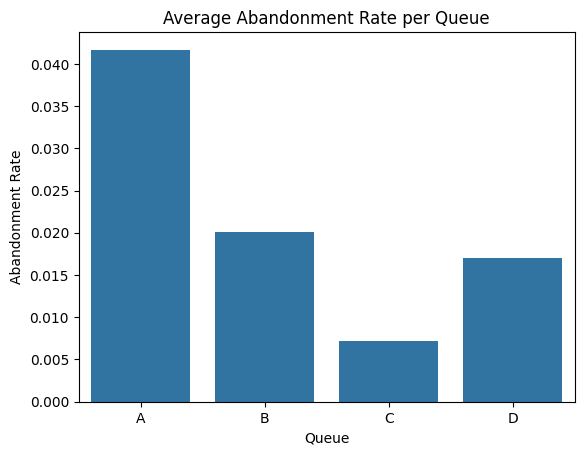

In [47]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns
df = pd.concat([North_df, South_df])
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dic = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dic["Abandoned"][i] / queue_dic["Calls"][i] 

#Your code below:
sns.barplot(data = abandonment_rates)
plt.title('Average Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')

##### Record your answer below:

> Chart style you chose and why: The question is asking for a specific abandonment rate per queue. With categorical data, we are expecting a different value for each category, and a bar chart is a good way to visualize this. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

   Rep ID  Incoming Wait Time
0  Amanda            2.908696
1    Andy            3.289130
2   Brent            2.850000
3     Cam            2.985417
4    Duke            2.922414
5     Joe            3.261538
6   Lilly            3.063333
7    Todd            3.143103
8  Xander            3.120833


Text(0.5, 1.0, 'Average Speed of Answer per Rep')

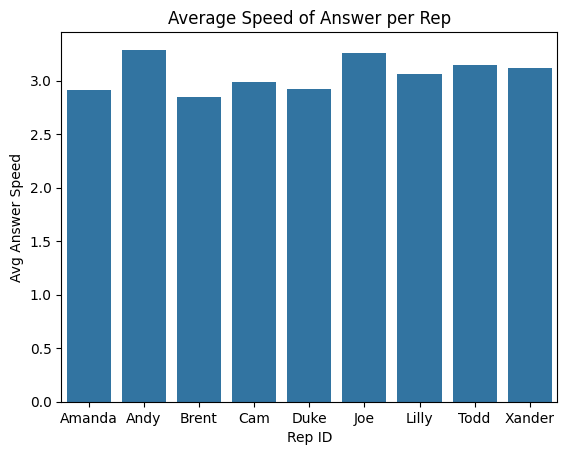

In [ ]:
# # Create visualization 2 here
# # north_plt contains the data you need for the average speed of answer of each rep
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
North_plt = North_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
print(North_plt)
# # Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# # Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = North_df[North_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# # Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = North_df[North_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# # Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# #Your Code Here:
plot1 = sns.barplot(data=North_plt, x="Rep ID", y="Incoming Wait Time")

plt.xlabel("Rep ID")
plt.ylabel("Avg Answer Speed")
plt.title("Average Speed of Answer per Rep")


Text(0.5, 1.0, 'Service Level % per Rep')

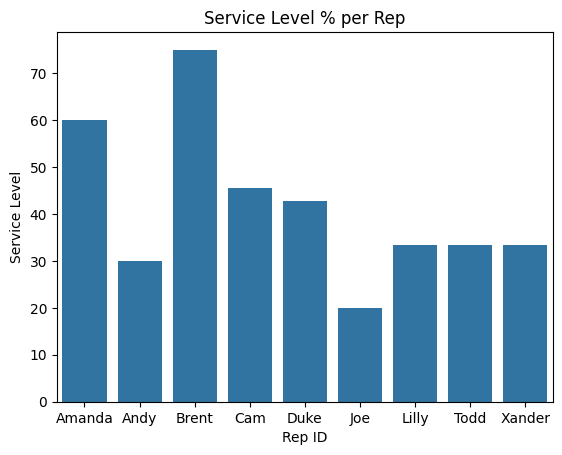

In [ ]:
plot2 = sns.barplot(data=service_level, x="Rep ID", y="Service Level %")
plt.xlabel("Rep ID")
plt.ylabel("Service Level")
plt.title("Service Level % per Rep")

##### Record your answer below:

> Chart style you chose and why: I chose to divide visualization 2 into two separate bar columns. The first visualization contains the average answer speed of each representative at the north branch. The second visualization contains the service level percentage of each representative. While both tables provide indivdual-level data on each rep, they measure very different things: one is formatted as a percentage, while the other is formatted as seconds. Since data is categorized by representative, I chose to use a bar chart. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

                                      count
Call Purpose    Incoming or Outgoing       
Complaint       Incoming                 51
Product Support Outgoing                228
                Incoming                 82
Sales Support   Outgoing                123
                Incoming                 75


Text(0.5, 1.0, 'Total Incoming and Outgoing Calls per Call Purpose')

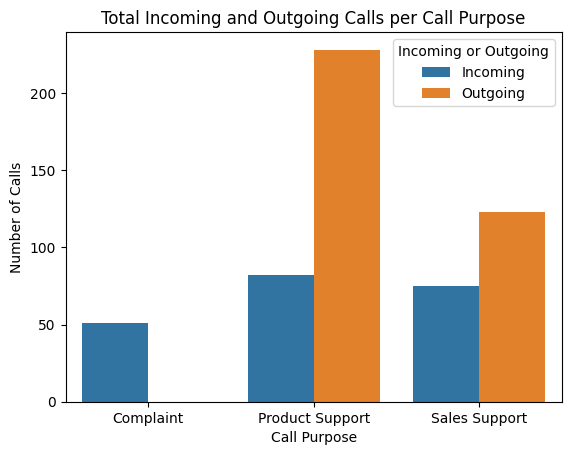

In [45]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
import pandas as pd
import matplotlib.pyplot as plt
df = pd.concat([North_df, South_df])

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
dataframe = pd.DataFrame(purpose_counts)
print(dataframe)
plot3 = sns.barplot(data=dataframe, x="Call Purpose", y=purpose_counts, hue="Incoming or Outgoing")
plt.xlabel("Call Purpose")
plt.ylabel("Number of Calls")
plt.title("Total Incoming and Outgoing Calls per Call Purpose")

##### Record your answer below:

> Chart style you chose and why: I chose to do a grouped bar plot to show the total number of incoming and outgoing calls per call purpose. The question wants to see the number of calls for multiple categories: incoming, outgoing, and per call purpose. Each call purpose may have both incoming and outgoing calls, and these are categorized/visualized separately. Therefore, a grouped bar chart would make most sense. Complaints are ONLY incoming, which we should expect, so there is not a column displayed for outgoing calls (because it is zero).

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
Brent and Amanda, both of whom are reps at the North branch, have the highest service level percentages. However, Joe and Andy, who are also reps at the North branch, have the lowest service level percentages. Additionally, every rep across both branches has comparable answer speeds. The branches do not display stark differences from one another, so it is hard to definitively determine which of the two branches is operating more efficiently.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: The North branch, in comparison to the South branch, has fewer reps. The North branch also has the rep with the highest number of calls; however, this rep only has 2 more calls than the South branch's rep with the highest number of calls. The South branch has, on average, a lower wait time than the North branch. The North branch has the higher percentage of total calls answered within two seconds. Based on this information, I think the North branch would benefit from the extra help, because although they may answer calls quickly, they have a higher abandonment rate, and they have fewer reps working at their branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: No, I think we were provided with a well-rounded dataset that provided a lot of information on the kinds of issues the branches face, including wait times, abandonment rates, the number of reps working at each branch, and the number of calls each rep has answered. Perhaps it would be interesting to know how many calls, on average, each branch gets each day. 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
# call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: